In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.table import Table as tbl
from astropy.table import vstack
%matplotlib inline

/home/nke2/miniconda3/envs/NUREU17/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [53]:
def lightcurve(source, periods):        #source--the raw lightcurve, period--freq1_freq from cesium.featurize
    nOid = np.unique(source['oid'])
    
    fig = plt.figure(figsize = (20, 15))   #Not 100% necessary
    
    #If true, then we uploaded a positional query
    for i in range(len(nOid)):
        want = np.where(source['oid'] == nOid[i])

        if (source['fid'][want][0] == 1):
            cmap = plt.cm.Greens_r
            filt = 'green filter'
        elif (source['fid'][want][0] == 2):
            cmap = plt.cm.Reds_r
            filt = 'Red filter'
        
        ax = plt.subplot2grid((4*len(nOid), 3), (3*i,0), colspan = 1)
        ax.scatter(source[want]['obsmjd'], source[want]['mag_autocorr'], c = cmap(source[want]['magerr_auto']))
        ax.errorbar(source[want]['obsmjd'], source[want]['mag_autocorr'], yerr = source[want]['magerr_auto'], fmt = 'none', c = cmap(source[want]['magerr_auto']), markersize = 5, label = 'Overall source curve')
        ax.set_ylabel('Magnitude')
        ax.set_xlabel('Time')
        ax.set_title('Total lightcurve of {0}'.format(nOid[i]))

        ax1 = plt.subplot2grid((4*len(nOid), 3), ((3*i + 1),0), rowspan = 1, colspan = 1)
        ax1.scatter((source[want]['obsmjd']/periods[i])%1, source[want]['mag_autocorr'], c = cmap(source[want]['magerr_auto']))
        ax1.errorbar((source[want]['obsmjd']/periods[i])%1, source[want]['mag_autocorr'], yerr = source[want]['magerr_auto'], fmt = 'none', c = cmap(source[want]['magerr_auto']), markersize = 3, label = filt)
        ax1.set_ylabel('Magnitude')
        ax1.set_xlabel('Phase')
        ax1.set_title('Folded lightcurve of {0} in {1}'.format(nOid[i], filt))
                        
    plt.tight_layout()

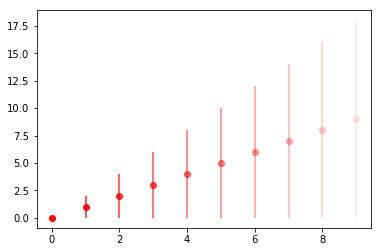

In [49]:
x = np.arange(0,10)
y = x
yerr = x

alphas = [1 - (err - np.min(yerr))/(10) for err in yerr]
colors = np.asarray([(1,0,0, alpha) for alpha in alphas])

for pos, ypos, yerr, color in zip(x,y,yerr,colors):
    plt.errorbar(pos, ypos, yerr = yerr, fmt = 'o', color = color)

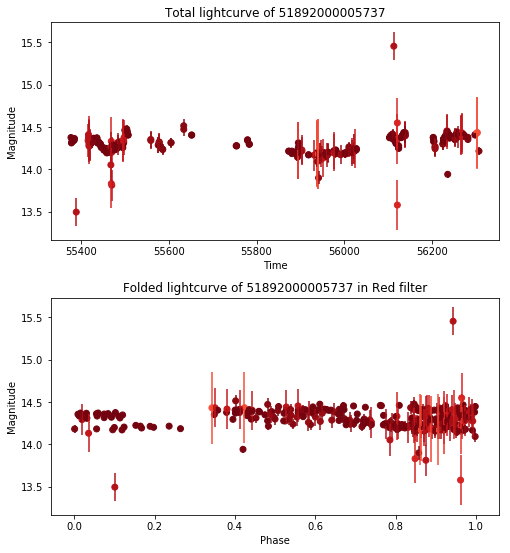

In [54]:
test = tbl.read('scripts/ptf_query/byOid/curves_oid___51892000005737.tbl', format = 'ipac')
mask = np.where(test['mag_autocorr'] > 0)
period = [1.00156182622]

lightcurve(test[mask], period)

Plot without error bars. Darker colors represent smaller errors. Not sure if error bars would be a helpful addition here or not. Currently, struggling to figure out a way to change the errorbars according to their size. This plot isnt phase folded but so far none of these are variable.

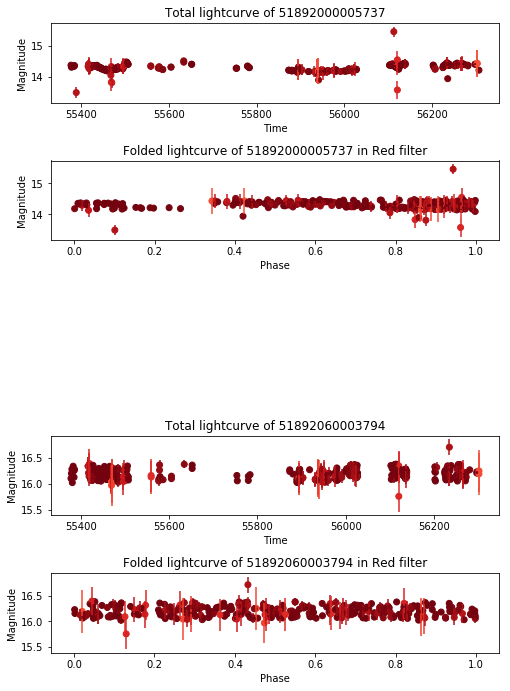

In [55]:
test2 = tbl.read('scripts/ptf_query/byOid/curves_oid___51892060003794.tbl', format = 'ipac')
test3 = vstack([test, test2])
mask3 = np.where(test3['mag_autocorr'] > 0)
periods = [1.00156182622, 0.0566304253118]
lightcurve(test3[mask3], periods)